In [2]:
import btrdb
from btrdb import *
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [169]:
# if you want to use a normal time as the start, use this command and plug the output into your start_epoch
# format is (Y,M,D,H,M,S)

dt.datetime(2020,5,31,11,36,56,445970).timestamp()

# 2020-05-31 18:42:26.445970
# - 7hr 5 min

#test
# dt.datetime.fromtimestamp(1590809579.234006) #spbc

1590950216.44597

In [4]:
# dt.datetime.fromtimestamp(start_epoch).day

In [228]:
# Initialize settings
# test ID is title for your plot, start_epoch is start time in epoch unit
# length_min defines the length of the window you want to select data from

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
vbase_ref = 4.16/np.sqrt(3)*1000
vbase_loc = 4.16/np.sqrt(3)*1000

timestep =  1 # [seconds]
length_min = 50

testID = 'HIL2_13NFunbal_T8-2_PI - '

# ctrl_start = 1592245377.439014
load_start = 1591732741
# start_epoch = ctrl_start - 0*timestep # time where data actually gets pulled
start_epoch = load_start - 2*0.009# time where data actually gets pulled


# set upmu ID's
gen3 = True # Needs to be true if gen3 uPMU streams, Flase if old (HIL1)

ref_pmu = 'upmu_0'
local_pmu = 'upmu_4' # upmu_123p for inverters, upmu_4 for load racks
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

# if constant phasor target, input here
cons_Vmag = np.array([0.99,0.99,0.99])
cons_Vang = np.array([0-1,-120-1,120-1])

cons_Vmagrel = cons_Vmag-1
cons_Vangrel = cons_Vang - [0,-120,120]

cons_Vmag2 = np.array([0.92,0.92,0.92])
cons_Vang2 = np.array([0-4,-120-4,120-4])
cons_Vmag3 = np.array([0.95,0.95,0.95])
cons_Vang3 = np.array([0-2.5,-120-2.5,120-2.5])

cons_Vangrel2 = cons_Vang2 - [0,-120,120]
cons_Vangrel3 = cons_Vang3 - [0,-120,120]
cons_Vmag,cons_Vangrel

(array([0.99, 0.99, 0.99]), array([-1, -1, -1]))

In [213]:
'OVERLAY SETTINGS'

overlay_start = 1590950222
overlay_epoch = overlay_start - 2*0.009# time where data actually gets pulled

overlay_pmu = local_pmu # upmu_123p / upmu_4

In [214]:
'calc control start end'
#start = datetime(2019,8,1,16,19, tzinfo=timezone.utc)
#startnano = start.timestamp() * 1e9
startnano = start_epoch * 1e9
start = dt.datetime.fromtimestamp(startnano/1e9)

endnano = startnano + (length_min*60 * 1e9)
end = dt.datetime.fromtimestamp(endnano/1e9)

seconds = end-start
seconds = int(seconds.total_seconds())

'calc overlay start end'
#start_OV = datetime(2019,8,1,16,19, tzinfo=timezone.utc)
#startnano_OV = start.timestamp() * 1e9
startnano_OV = overlay_epoch * 1e9
start_OV = dt.datetime.fromtimestamp(startnano_OV/1e9)

endnano_OV = startnano_OV + (length_min*60 * 1e9)
end_OV = dt.datetime.fromtimestamp(endnano_OV/1e9)

# print(start)
# print(startnano)
# print(end)
# print(endnano)

In [215]:
'PULL CONTROL DATA'
"""
This code snippet provides variable values from the visualization tool that you can use
in a Jupyter notebook or Python script to conduct further analysis.

Please see the documentation for advanced usage and help:
https://btrdb.readthedocs.io/en/latest/
"""
'''

start = datetime(2019,8,1,16,19, tzinfo=timezone.utc)
start = start.timestamp() * 1e9
end = start + (5*60 * 1e9)

'''
if df is not None:
    del df

# Contains variables required to query data from plotter

if gen3 == False:

    if local_pmu == 'upmu_123p':   
        CHART_VARS = {
            "all_uuids": [
            "fe2b0a79-977a-5d49-8c37-45c0191b9f20",
            "f4b15d09-15f4-5efb-acce-d26168d325c8",
            "58961ae7-4245-5287-bdb4-33d7197b18ac",
            "9576f0b0-6a19-55c9-acbc-c08c426816b5",
            "220c2466-4f3a-5c7b-9570-9f5fe0133816",
            "dfe3cab7-df13-5952-9acc-43b191a5b2f1",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
        ],
        "visible_uuids": [
            "fe2b0a79-977a-5d49-8c37-45c0191b9f20",
            "f4b15d09-15f4-5efb-acce-d26168d325c8",
            "58961ae7-4245-5287-bdb4-33d7197b18ac",
            "9576f0b0-6a19-55c9-acbc-c08c426816b5",
            "220c2466-4f3a-5c7b-9570-9f5fe0133816",
            "dfe3cab7-df13-5952-9acc-43b191a5b2f1",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
            ],
            "start_time": {
                "iso": start,
                "epochnano": startnano
            },
            "end_time": {
                "iso": end,
                "epochnano": endnano
            },
            "resolution": 31
        }

    if local_pmu == 'upmu_4':   
        CHART_VARS = {
            "all_uuids": [
            "611cd2df-f843-531e-b8d8-f0ef620e767f",
            "0193bdee-c4bb-5126-85c4-41bb95146b8c",
            "5ce8fe71-a8a8-55c5-bd31-bdc9ac60ba51",
            "5bf29eaa-46a7-556b-84e7-89d75d6f8fed",
            "022386e4-7c70-594c-8315-bf371243f7d8",
            "57ab7fd7-ce36-58aa-b1bf-c763d6245cec",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
        ],
        "visible_uuids": [
            "611cd2df-f843-531e-b8d8-f0ef620e767f",
            "0193bdee-c4bb-5126-85c4-41bb95146b8c",
            "5ce8fe71-a8a8-55c5-bd31-bdc9ac60ba51",
            "5bf29eaa-46a7-556b-84e7-89d75d6f8fed",
            "022386e4-7c70-594c-8315-bf371243f7d8",
            "57ab7fd7-ce36-58aa-b1bf-c763d6245cec",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
            ],
            "start_time": {
                "iso": start,
                "epochnano": startnano
            },
            "end_time": {
                "iso": end,
                "epochnano": endnano
            },
            "resolution": 31
        }
        
if gen3 == True:
    
    if local_pmu == 'upmu_123p':
        CHART_VARS = {
            "all_uuids": [
                "4abcc6e0-5ddd-528a-8853-d0b8e2dfa13f",
                "3eee1f9a-ce3e-5006-a6a2-f9fb052a567a",
                "bdc91735-3c9f-58b5-bef1-6c0457003b79",
                "2527e342-6fd5-53c3-8295-118176286a46",
                "071e6fd8-b138-5157-9266-b5b019bfa96e",
                "15e0f3fa-6aab-59f2-bc7c-5ef77129cdb4",
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482"
            ],
            "visible_uuids": [
                "4abcc6e0-5ddd-528a-8853-d0b8e2dfa13f",
                "3eee1f9a-ce3e-5006-a6a2-f9fb052a567a",
                "bdc91735-3c9f-58b5-bef1-6c0457003b79",
                "2527e342-6fd5-53c3-8295-118176286a46",
                "071e6fd8-b138-5157-9266-b5b019bfa96e",
                "15e0f3fa-6aab-59f2-bc7c-5ef77129cdb4",
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482"
            ],
            "start_time": {
                "iso": start,
                "epochnano": startnano
            },
            "end_time": {
                "iso": end,
                "epochnano": endnano
            },
            "resolution": 36
        }
    
    if local_pmu == 'upmu_4':      
        CHART_VARS = {
            "all_uuids": [
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482",
                "29aac111-6d45-5341-a5bc-8541a9c625e5",
                "745afe50-cdce-5f6d-a38a-a16c7a826669",
                "527ad75c-e5d6-55ba-a9d4-35f488a3af78",
                "dea0b773-cd23-5c31-b717-bac36e986584",
                "ec35d372-dc90-5520-a739-a8154f647486",
                "1f11eb0d-2e44-5b5b-a9dc-e3eb307f2efb"
            ],
            "visible_uuids": [
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482",
                "29aac111-6d45-5341-a5bc-8541a9c625e5",
                "745afe50-cdce-5f6d-a38a-a16c7a826669",
                "527ad75c-e5d6-55ba-a9d4-35f488a3af78",
                "dea0b773-cd23-5c31-b717-bac36e986584",
                "ec35d372-dc90-5520-a739-a8154f647486",
                "1f11eb0d-2e44-5b5b-a9dc-e3eb307f2efb"
            ],
            "start_time": {
                "iso": start,
                "epochnano": startnano
            },
            "end_time": {
                "iso": end,
                "epochnano": endnano
            },
            "resolution": 31
        }

# Configure connection to BTrDB
BTRDB_URL    = 'api.research.predictivegrid.com:4411' # or set environment variable $BTRDB_ENDPOINTS
BTRDB_APIKEY = 'DE4AD7B004A6C9EC9923C341' # or set environment variable $BTRDB_API_KEY


# Define utility functions
def get_streams(conn, filter=True, visible_only=True, chart=CHART_VARS):
    """
    Get the StreamSet for either all streams or visible streams. By default, this
    function also filters the streams by the start and end time from the chart.
    """
    key = "visible_uuids" if visible_only else "all_uuids"
    streams = conn.streams(*chart[key])

    if filter:
        streams = streams.filter(
          start=chart["start_time"]["epochnano"], end=chart["end_time"]["epochnano"]
        )

    return streams


# Connect to the database
db = btrdb.connect(BTRDB_URL, apikey=BTRDB_APIKEY)

# Query the dataset to get a DataFrame of the exported chart
streams = get_streams(db)
df = streams.to_dataframe()

In [216]:
df = df.reindex(sorted(df.columns), axis=1)
df = df.reset_index()
#dt.datetime.utcfromtimestamp(df.time.values[len(df)-1]/1e9)
print(df.shape)
df.head()

(254530, 13)


,time,energize/gen3/upmu_0/PH0ANG L1MagAng +SV,energize/gen3/upmu_0/PH0MAG L1MagAng +SV,energize/gen3/upmu_0/PH1ANG L2MagAng +SV,energize/gen3/upmu_0/PH1MAG L2MagAng +SV,energize/gen3/upmu_0/PH2ANG L3MagAng +SV,energize/gen3/upmu_0/PH2MAG L3MagAng +SV,energize/gen3/upmu_4/PH0ANG L1MagAng +SV,energize/gen3/upmu_4/PH0MAG L1MagAng +SV,energize/gen3/upmu_4/PH1ANG L2MagAng +SV,energize/gen3/upmu_4/PH1MAG L2MagAng +SV,energize/gen3/upmu_4/PH2ANG L3MagAng +SV,energize/gen3/upmu_4/PH2MAG L3MagAng +SV
0,1591732740983333348,80.449096,2401.580322,-39.546430,2400.641602,-159.575813,2400.667236,NaN,NaN,NaN,NaN,NaN,NaN
1,1591732740991666674,80.460291,2401.161621,-39.553205,2400.817383,-159.563697,2401.315430,NaN,NaN,NaN,NaN,NaN,NaN
2,1591732741008333325,NaN,NaN,NaN,NaN,NaN,NaN,80.279113,2398.277100,-39.603749,2394.094238,-159.816946,2396.336426
3,1591732741016666651,NaN,NaN,NaN,NaN,NaN,NaN,80.323619,2397.550049,-39.614595,2394.235352,-159.790336,2397.593262
4,1591732741024999977,NaN,NaN,NaN,NaN,NaN,NaN,80.300669,2398.565430,-39.630960,2394.267822,-159.792385,2396.406006


In [217]:
ref_mag = []
ref_ang = []
local_mag = []
local_ang = []

for header in df.columns:
    if ref_pmu in header:
        if 'MAG' in header:
            ref_mag.append(header)
        if 'ANG' in header:
            ref_ang.append(header)
    if local_pmu in header:
        if 'MAG' in header:
            local_mag.append(header)
        if 'ANG' in header:
            local_ang.append(header)


In [229]:
#measured relative values

#df['rel_magL1'] = (df[local_mag[0]]/vbase_loc-df[ref_mag[0]]/vbase_ref)
#df['rel_magL2'] = (df[local_mag[1]]/vbase_loc-df[ref_mag[1]]/vbase_ref)
#df['rel_magL3'] = (df[local_mag[2]]/vbase_loc-df[ref_mag[2]]/vbase_ref)
df['rel_magL1'] = (df[local_mag[0]]/vbase_loc)
df['rel_magL2'] = (df[local_mag[1]]/vbase_loc)
df['rel_magL3'] = (df[local_mag[2]]/vbase_loc)
df['rel_angL1'] = (df[local_ang[0]]-df[ref_ang[0]])
df['rel_angL2'] = (df[local_ang[1]]-df[ref_ang[1]])
df['rel_angL3'] = (df[local_ang[2]]-df[ref_ang[2]])

# df['rel_angL1'] = (df[local_ang[0]]-df[ref_ang[0]]) #ONLY FOR T12
# df['rel_angL2'] = (df[local_ang[1]]-df[ref_ang[0]]) #ONLY FOR T12
# df['rel_angL3'] = (df[local_ang[2]]-df[ref_ang[0]]) #ONLY FOR T12

rel_headers = []
for header in df.columns:
    if 'rel_' in header:
        rel_headers.append(header)
print(rel_headers)

#target relative values

Vmag_targ = np.ones((df.shape[0],3))
Vang_targ = np.ones((df.shape[0],3))
Vmag_targ[:,:] = Vmag_targ*cons_Vmag
Vang_targ[:,:] = Vang_targ*cons_Vangrel

df['targ_magL1'] = Vmag_targ[:,0]
df['targ_magL2'] = Vmag_targ[:,1]
df['targ_magL3'] = Vmag_targ[:,2]
df['targ_angL1'] = Vang_targ[:,0]
df['targ_angL2'] = Vang_targ[:,1]
df['targ_angL3'] = Vang_targ[:,2]

targ_headers = []
for header in df.columns:
    if 'targ_' in header:
        targ_headers.append(header)
print(targ_headers)

'add additional targets for varying target test cases'
Vmag_targ2, Vang_targ2,  = np.ones((df.shape[0],3)), np.ones((df.shape[0],3))
Vmag_targ3, Vang_targ3 = np.ones((df.shape[0],3)), np.ones((df.shape[0],3))
Vmag_targ2[:,:] = Vmag_targ2*cons_Vmag2
Vang_targ2[:,:] = Vang_targ2*cons_Vangrel2
Vmag_targ3[:,:] = Vmag_targ3*cons_Vmag3
Vang_targ3[:,:] = Vang_targ3*cons_Vangrel3

df['targ2_magL1'], df['targ2_magL2'], df['targ2_magL3'] = Vmag_targ2[:,0], Vmag_targ2[:,1], Vmag_targ2[:,2]
df['targ2_angL1'], df['targ2_angL2'], df['targ2_angL3'] = Vang_targ2[:,0], Vang_targ2[:,1], Vang_targ2[:,2]
df['targ3_magL1'], df['targ3_magL2'], df['targ3_magL3'] = Vmag_targ3[:,0], Vmag_targ3[:,1], Vmag_targ3[:,2]
df['targ3_angL1'], df['targ3_angL2'], df['targ3_angL3'] = Vang_targ3[:,0], Vang_targ3[:,1], Vang_targ3[:,2]

targ2_headers = [] #add target
for header in df.columns: #add target
    if 'targ2' in header: #add target
        targ2_headers.append(header) #add target
print(targ2_headers) #add target

targ3_headers = [] #add target
for header in df.columns: #add target
    if 'targ3' in header: #add target
        targ3_headers.append(header) #add target
print(targ3_headers) #add target

df['sec_elap'] = (df['time']-df['time'][0])/1e9
df['timesteps'] = df['sec_elap']/timestep

['rel_magL1', 'rel_magL2', 'rel_magL3', 'rel_angL1', 'rel_angL2', 'rel_angL3']
['targ_magL1', 'targ_magL2', 'targ_magL3', 'targ_angL1', 'targ_angL2', 'targ_angL3']
['targ2_magL1', 'targ2_magL2', 'targ2_magL3', 'targ2_angL1', 'targ2_angL2', 'targ2_angL3']
['targ3_magL1', 'targ3_magL2', 'targ3_magL3', 'targ3_angL1', 'targ3_angL2', 'targ3_angL3']


In [219]:
for header in rel_headers[3:6]:
    idx = df.loc[df[header]>300.].index
    if len(idx) > 0:
        if df[header][idx[0]] > 0:
            print(df[header][idx[2]])

In [220]:
for header in rel_headers[3:6]:
    idx = df.loc[df[header]<-300.].index
    if len(idx) > 0:
        if df[header][idx[0]] < 0:
            print(df[header][idx[0]])

In [221]:
for header in rel_headers[3:6]:
    idx = df.loc[df[header]>300.].index
    if len(idx) > 0:
        if df[header][idx[0]] > 0:
            df[header][idx] = df[header][idx]-360.
    idx = df.loc[df[header]<-300.].index
    if len(idx) > 0:
        if df[header][idx[0]] < 0:
            df[header][idx] = df[header][idx]+360.

In [222]:
# for header in rel_headers[3:6]:
#     idx = df.loc[df[header]>300.].index
#     if len(idx) > 0:
#         if df[header][idx[0]] > 0:
#             df[header][idx] = df[header][idx]-360.
#         if df[header][idx[0]] > 0:
#             df[header][idx] = df[header][idx]+360.

In [223]:
'PULL OVERLAY DATA'
"""
This code snippet provides variable values from the visualization tool that you can use
in a Jupyter notebook or Python script to conduct further analysis.

Please see the documentation for advanced usage and help:
https://btrdb.readthedocs.io/en/latest/
"""
'''

start = datetime(2019,8,1,16,19, tzinfo=timezone.utc)
start = start.timestamp() * 1e9
end = start + (5*60 * 1e9)

'''
if df_OV is not None:
    del df_OV

# Contains variables required to query data from plotter

if gen3 == False:

    if overlay_pmu == 'upmu_123p':   
        CHART_VARS = {
            "all_uuids": [
            "fe2b0a79-977a-5d49-8c37-45c0191b9f20",
            "f4b15d09-15f4-5efb-acce-d26168d325c8",
            "58961ae7-4245-5287-bdb4-33d7197b18ac",
            "9576f0b0-6a19-55c9-acbc-c08c426816b5",
            "220c2466-4f3a-5c7b-9570-9f5fe0133816",
            "dfe3cab7-df13-5952-9acc-43b191a5b2f1",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
        ],
        "visible_uuids": [
            "fe2b0a79-977a-5d49-8c37-45c0191b9f20",
            "f4b15d09-15f4-5efb-acce-d26168d325c8",
            "58961ae7-4245-5287-bdb4-33d7197b18ac",
            "9576f0b0-6a19-55c9-acbc-c08c426816b5",
            "220c2466-4f3a-5c7b-9570-9f5fe0133816",
            "dfe3cab7-df13-5952-9acc-43b191a5b2f1",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
            ],
            "start_time": {
                "iso": start_OV,
                "epochnano": startnano_OV
            },
            "end_time": {
                "iso": end_OV,
                "epochnano": endnano_OV
            },
            "resolution": 31
        }

    if overlay_pmu == 'upmu_4':   
        CHART_VARS = {
            "all_uuids": [
            "611cd2df-f843-531e-b8d8-f0ef620e767f",
            "0193bdee-c4bb-5126-85c4-41bb95146b8c",
            "5ce8fe71-a8a8-55c5-bd31-bdc9ac60ba51",
            "5bf29eaa-46a7-556b-84e7-89d75d6f8fed",
            "022386e4-7c70-594c-8315-bf371243f7d8",
            "57ab7fd7-ce36-58aa-b1bf-c763d6245cec",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
        ],
        "visible_uuids": [
            "611cd2df-f843-531e-b8d8-f0ef620e767f",
            "0193bdee-c4bb-5126-85c4-41bb95146b8c",
            "5ce8fe71-a8a8-55c5-bd31-bdc9ac60ba51",
            "5bf29eaa-46a7-556b-84e7-89d75d6f8fed",
            "022386e4-7c70-594c-8315-bf371243f7d8",
            "57ab7fd7-ce36-58aa-b1bf-c763d6245cec",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
            ],
            "start_time": {
                "iso": start_OV,
                "epochnano": startnano_OV
            },
            "end_time": {
                "iso": end_OV,
                "epochnano": endnano_OV
            },
            "resolution": 31
        }
        
if gen3 == True:
    
    if overlay_pmu == 'upmu_123p':
        CHART_VARS = {
            "all_uuids": [
                "4abcc6e0-5ddd-528a-8853-d0b8e2dfa13f",
                "3eee1f9a-ce3e-5006-a6a2-f9fb052a567a",
                "bdc91735-3c9f-58b5-bef1-6c0457003b79",
                "2527e342-6fd5-53c3-8295-118176286a46",
                "071e6fd8-b138-5157-9266-b5b019bfa96e",
                "15e0f3fa-6aab-59f2-bc7c-5ef77129cdb4",
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482"
            ],
            "visible_uuids": [
                "4abcc6e0-5ddd-528a-8853-d0b8e2dfa13f",
                "3eee1f9a-ce3e-5006-a6a2-f9fb052a567a",
                "bdc91735-3c9f-58b5-bef1-6c0457003b79",
                "2527e342-6fd5-53c3-8295-118176286a46",
                "071e6fd8-b138-5157-9266-b5b019bfa96e",
                "15e0f3fa-6aab-59f2-bc7c-5ef77129cdb4",
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482"
            ],
            "start_time": {
                "iso": start_OV,
                "epochnano": startnano_OV
            },
            "end_time": {
                "iso": end_OV,
                "epochnano": endnano_OV
            },
            "resolution": 36
        }
    
    if overlay_pmu == 'upmu_4':      
        CHART_VARS = {
            "all_uuids": [
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482",
                "29aac111-6d45-5341-a5bc-8541a9c625e5",
                "745afe50-cdce-5f6d-a38a-a16c7a826669",
                "527ad75c-e5d6-55ba-a9d4-35f488a3af78",
                "dea0b773-cd23-5c31-b717-bac36e986584",
                "ec35d372-dc90-5520-a739-a8154f647486",
                "1f11eb0d-2e44-5b5b-a9dc-e3eb307f2efb"
            ],
            "visible_uuids": [
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482",
                "29aac111-6d45-5341-a5bc-8541a9c625e5",
                "745afe50-cdce-5f6d-a38a-a16c7a826669",
                "527ad75c-e5d6-55ba-a9d4-35f488a3af78",
                "dea0b773-cd23-5c31-b717-bac36e986584",
                "ec35d372-dc90-5520-a739-a8154f647486",
                "1f11eb0d-2e44-5b5b-a9dc-e3eb307f2efb"
            ],
            "start_time": {
                "iso": start_OV,
                "epochnano": startnano_OV
            },
            "end_time": {
                "iso": end_OV,
                "epochnano": endnano_OV
            },
            "resolution": 31
        }

# Configure connection to BTrDB
BTRDB_URL    = 'api.research.predictivegrid.com:4411' # or set environment variable $BTRDB_ENDPOINTS
BTRDB_APIKEY = 'DE4AD7B004A6C9EC9923C341' # or set environment variable $BTRDB_API_KEY


# Define utility functions
def get_streams(conn, filter=True, visible_only=True, chart=CHART_VARS):
    """
    Get the StreamSet for either all streams or visible streams. By default, this
    function also filters the streams by the start and end time from the chart.
    """
    key = "visible_uuids" if visible_only else "all_uuids"
    streams = conn.streams(*chart[key])

    if filter:
        streams = streams.filter(
          start=chart["start_time"]["epochnano"], end=chart["end_time"]["epochnano"]
        )

    return streams


# Connect to the database
db = btrdb.connect(BTRDB_URL, apikey=BTRDB_APIKEY)

# Query the dataset to get a DataFrame of the exported chart
streams = get_streams(db)
df_OV = streams.to_dataframe()

In [224]:
df_OV = df_OV.reindex(sorted(df_OV.columns), axis=1)
df_OV = df_OV.reset_index()
print(df_OV.shape)
df_OV.head()

(353984, 13)


,time,energize/gen3/upmu_0/PH0ANG L1MagAng +SV,energize/gen3/upmu_0/PH0MAG L1MagAng +SV,energize/gen3/upmu_0/PH1ANG L2MagAng +SV,energize/gen3/upmu_0/PH1MAG L2MagAng +SV,energize/gen3/upmu_0/PH2ANG L3MagAng +SV,energize/gen3/upmu_0/PH2MAG L3MagAng +SV,energize/gen3/upmu_4/PH0ANG L1MagAng +SV,energize/gen3/upmu_4/PH0MAG L1MagAng +SV,energize/gen3/upmu_4/PH1ANG L2MagAng +SV,energize/gen3/upmu_4/PH1MAG L2MagAng +SV,energize/gen3/upmu_4/PH2ANG L3MagAng +SV,energize/gen3/upmu_4/PH2MAG L3MagAng +SV
0,1590950221983333348,-8.705202,2399.483154,-128.698864,2401.847412,111.279990,2400.539795,-8.788667,2397.409424,-128.838856,2393.722412,111.058473,2399.523193
1,1590950221991666674,-8.701623,2400.523682,-128.676133,2399.974609,111.293274,2400.891602,-8.799896,2396.408936,-128.841670,2393.062500,111.073588,2398.678467
2,1590950222008333325,-8.698482,2400.133545,-128.680996,2399.416504,111.323327,2401.107178,-8.789460,2396.009521,-128.829075,2394.709229,111.066628,2398.906982
3,1590950222016666651,-8.692772,2399.395508,-128.664932,2402.392090,111.276568,2400.027832,-8.802191,2396.431396,-128.831452,2394.324707,111.066997,2398.320312
4,1590950222024999977,-8.700175,2400.227783,-128.696460,2402.647705,111.306607,2399.970947,-8.826725,2395.650879,-128.838664,2393.479492,111.081668,2399.370361


In [225]:
ref_mag_OV = []
ref_ang_OV = []
local_mag_OV = []
local_ang_OV = []

for header in df_OV.columns:
    if ref_pmu in header:
        if 'MAG' in header:
            ref_mag_OV.append(header)
        if 'ANG' in header:
            ref_ang_OV.append(header)
    if overlay_pmu in header:
        if 'MAG' in header:
            local_mag_OV.append(header)
        if 'ANG' in header:
            local_ang_OV.append(header)

'measured relative values - magnitude isnt actually relative, naming is artifact of previous version'
df_OV['rel_magL1'] = (df_OV[local_mag_OV[0]]/vbase_loc)
df_OV['rel_magL2'] = (df_OV[local_mag_OV[1]]/vbase_loc)
df_OV['rel_magL3'] = (df_OV[local_mag_OV[2]]/vbase_loc)
df_OV['rel_angL1'] = (df_OV[local_ang_OV[0]]-df_OV[ref_ang_OV[0]])
df_OV['rel_angL2'] = (df_OV[local_ang_OV[1]]-df_OV[ref_ang_OV[1]])
df_OV['rel_angL3'] = (df_OV[local_ang_OV[2]]-df_OV[ref_ang_OV[2]])

# df['rel_angL1'] = (df[local_ang[0]]-df[ref_ang[0]]) #ONLY FOR T12
# df['rel_angL2'] = (df[local_ang[1]]-df[ref_ang[0]]) #ONLY FOR T12
# df['rel_angL3'] = (df[local_ang[2]]-df[ref_ang[0]]) #ONLY FOR T12

rel_headers_OV = []
for header in df_OV.columns:
    if 'rel_' in header:
        rel_headers_OV.append(header)

df_OV['sec_elap'] = (df_OV['time']-df_OV['time'][0])/1e9
df_OV['timesteps'] = df_OV['sec_elap']/timestep

'account for angle rotation crossing 360'
for header in rel_headers_OV[3:6]:
    idx = df_OV.loc[df_OV[header]>300.].index
    if len(idx) > 0:
        if df_OV[header][idx[0]] > 0:
            df_OV[header][idx] = df_OV[header][idx]-360.
    idx = df_OV.loc[df_OV[header]<-300.].index
    if len(idx) > 0:
        if df_OV[header][idx[0]] < 0:
            df_OV[header][idx] = df_OV[header][idx]+360.


In [226]:
df_OV.head()

,time,energize/gen3/upmu_0/PH0ANG L1MagAng +SV,energize/gen3/upmu_0/PH0MAG L1MagAng +SV,energize/gen3/upmu_0/PH1ANG L2MagAng +SV,energize/gen3/upmu_0/PH1MAG L2MagAng +SV,energize/gen3/upmu_0/PH2ANG L3MagAng +SV,energize/gen3/upmu_0/PH2MAG L3MagAng +SV,energize/gen3/upmu_4/PH0ANG L1MagAng +SV,energize/gen3/upmu_4/PH0MAG L1MagAng +SV,energize/gen3/upmu_4/PH1ANG L2MagAng +SV,...,energize/gen3/upmu_4/PH2ANG L3MagAng +SV,energize/gen3/upmu_4/PH2MAG L3MagAng +SV,rel_magL1,rel_magL2,rel_magL3,rel_angL1,rel_angL2,rel_angL3,sec_elap,timesteps
0,1590950221983333348,-8.705202,2399.483154,-128.698864,2401.847412,111.279990,2400.539795,-8.788667,2397.409424,-128.838856,...,111.058473,2399.523193,0.998181,0.996646,0.999062,-0.083465,-0.139992,-0.221517,0.000000,0.000000
1,1590950221991666674,-8.701623,2400.523682,-128.676133,2399.974609,111.293274,2400.891602,-8.799896,2396.408936,-128.841670,...,111.073588,2398.678467,0.997765,0.996372,0.998710,-0.098273,-0.165536,-0.219686,0.008333,0.008333
2,1590950222008333325,-8.698482,2400.133545,-128.680996,2399.416504,111.323327,2401.107178,-8.789460,2396.009521,-128.829075,...,111.066628,2398.906982,0.997599,0.997057,0.998805,-0.090978,-0.148079,-0.256699,0.025000,0.025000
3,1590950222016666651,-8.692772,2399.395508,-128.664932,2402.392090,111.276568,2400.027832,-8.802191,2396.431396,-128.831452,...,111.066997,2398.320312,0.997774,0.996897,0.998561,-0.109420,-0.166520,-0.209571,0.033333,0.033333
4,1590950222024999977,-8.700175,2400.227783,-128.696460,2402.647705,111.306607,2399.970947,-8.826725,2395.650879,-128.838664,...,111.081668,2399.370361,0.997449,0.996545,0.998998,-0.126550,-0.142205,-0.224939,0.041667,0.041667


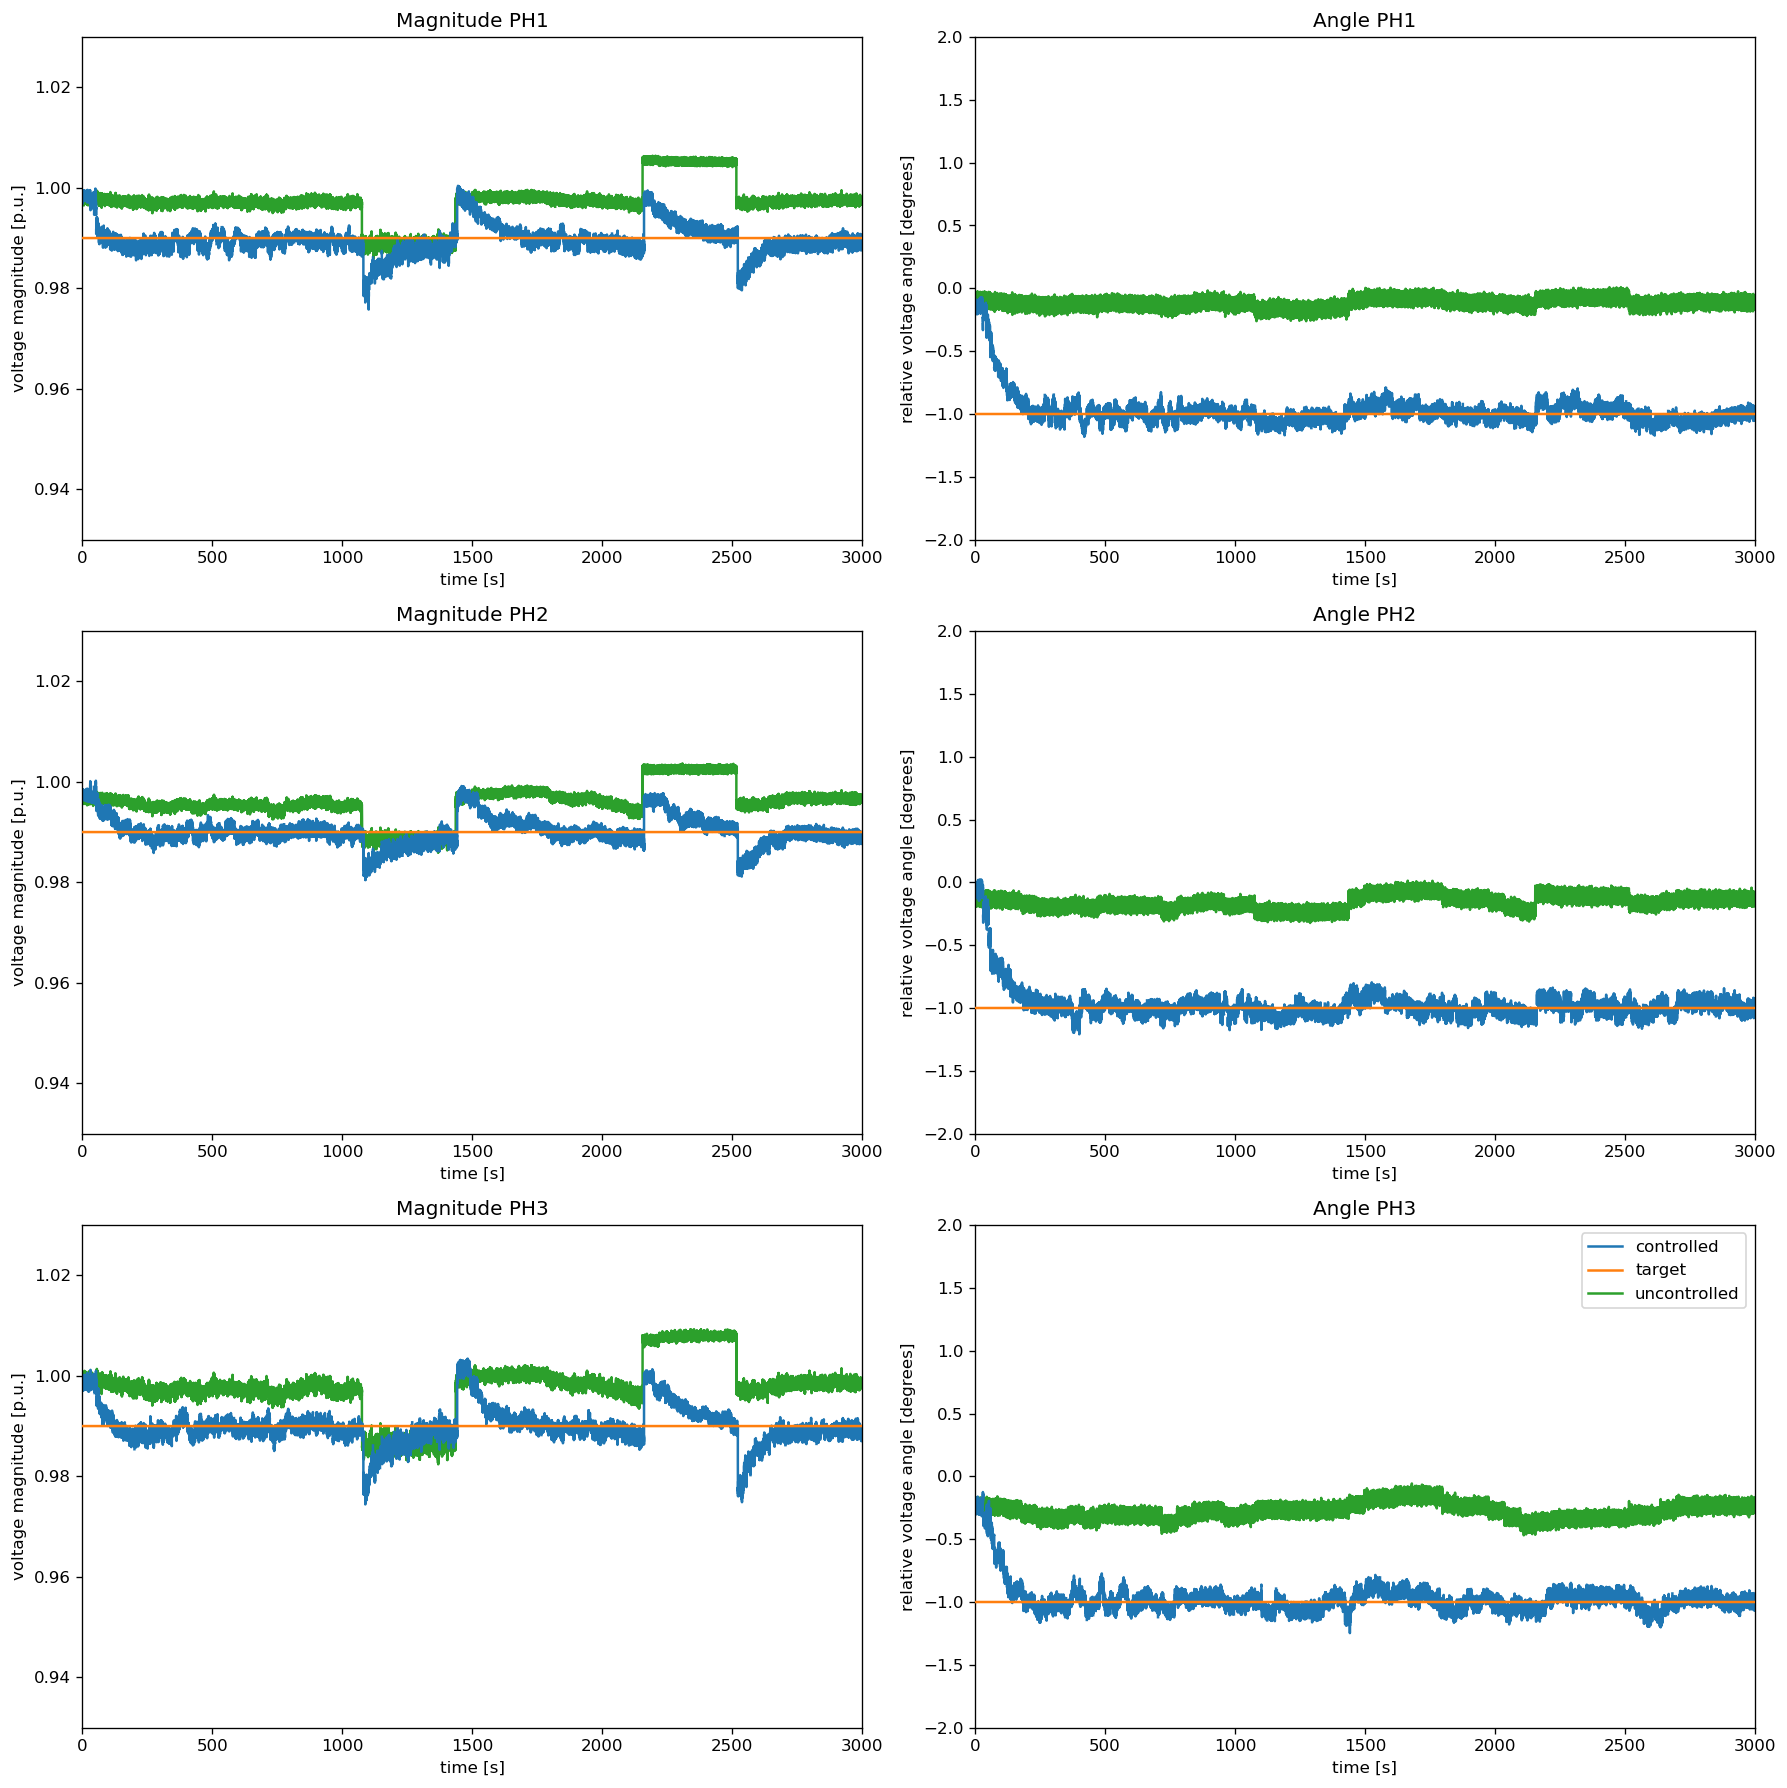

In [234]:
phase = ['PH1','PH2','PH3']

#axis settings:
#ymag_min, ymag_max = 0.98, 1.
ymag_min, ymag_max = 0.93, 1.03
yang_min, yang_max = -2, 2
#yang_min, yang_max = -6, 1
# xmin, xmax = 1070,1090
# xmin, xmax = 0*60/timestep, 30*60/timestep
xmin, xmax = 0, length_min*60/timestep
#xticks = np.arange(0,600,seconds/df.shape[0])

#PLOT
plt.figure(num=1, figsize=(15, 15), dpi=120, facecolor='w', edgecolor='k')
for i in range(3):
    plt.subplot(3,2,i*2+1)
    plt.plot(df['timesteps'],df[rel_headers[i]], zorder=2, label='controlled') #plot pmu measurements
    plt.plot(df['timesteps'],df[targ_headers[i]],zorder=3, label='target') #plot target line
    plt.plot(df_OV['timesteps'],df_OV[rel_headers_OV[i]],zorder=1, label='uncontrolled') #plot overlay measurements
#     plt.plot(df['timesteps'],df[targ2_headers[i]])
#     plt.plot(df['timesteps'],df[targ3_headers[i]])
    plt.ylabel('voltage magnitude [p.u.]')
    plt.ylim(ymag_min,ymag_max)
    plt.xlim(xmin,xmax)
    # plt.title(testID + phase[i] + '_MAG')
    plt.title('Magnitude ' + phase[i])
    plt.xlabel('time [s]')
    plt.subplot(3,2,i*2+2)
    plt.plot(df['timesteps'],df[rel_headers[i+3]],zorder=2, label='controlled') #plot pmu measurements
    plt.plot(df['timesteps'],df[targ_headers[i+3]],zorder=3, label='target') #plot target line
    plt.plot(df_OV['timesteps'],df_OV[rel_headers_OV[i+3]],zorder=1, label='uncontrolled') #plot overlay measurements
#     plt.plot(df['timesteps'],df[targ2_headers[i+3]])
#     plt.plot(df['timesteps'],df[targ3_headers[i+3]])
    plt.ylabel('relative voltage angle [degrees]')
    plt.ylim(yang_min,yang_max)
    plt.xlim(xmin,xmax)
    #plt.ylim(df[targ_headers[i+3]][0]-1.5*np.abs(df[targ_headers[i+3]][0]),df[targ_headers[i+3]][0]+1.5*np.abs(df[targ_headers[i+3]][0]))
#     plt.title(testID + phase[i] + '_ANG')
    plt.title('Angle ' + phase[i])
    #plt.xticks(xticks)
    plt.xlabel('time [s]')
plt.legend()
plt.tight_layout()

ctrlmonth = str(dt.datetime.fromtimestamp(start_epoch).month)
ctrlday = str(dt.datetime.fromtimestamp(start_epoch).day)
ctrlhr = str(dt.datetime.fromtimestamp(start_epoch).hour)
ctrlmin = str(dt.datetime.fromtimestamp(start_epoch).minute)


'~~ change file name ~~'
filename = f'{testID[0:-3]}_{ctrlmonth}-{ctrlday}_{ctrlhr}-{ctrlmin}_OV_50m_paper'
'~~~~~~~~~~~~~~~~~~~~~~'

# plt.show()
plt.savefig(f'Test_Results/HIL2/2_FINALS/Plots/{testID[0:-3]}_{filename}.png', bbox_inches = 'tight')

In [102]:
df2 = df.drop(['timesteps'],axis=1)
df2.to_csv(f'Test_Results/HIL2/3_CIL2/CSVs/{filename}.csv')
del df2

In [182]:
df2 = df_OV.drop(['timesteps'],axis=1)
df2.to_csv(f'Test_Results/HIL2/3_CIL2/CSVs/{filename}.csv')
del df2